# An√°lisis de Subjetividad de Opiniones Tur√≠sticas

Este notebook realiza un an√°lisis de subjetividad sobre las opiniones tur√≠sticas utilizando modelos preentrenados de HuggingFace para clasificar texto en: **Subjetivo vs Objetivo**.

## Objetivos:
- Aplicar modelo multiling√ºe especializado en an√°lisis de subjetividad
- Generar estad√≠sticas descriptivas y visualizaciones
- Analizar relaci√≥n entre subjetividad y sentimientos (si est√°n disponibles)

## Modelo utilizado:
- **GroNLP/mdebertav3-subjectivity-multilingual**: Modelo multiling√ºe especializado en an√°lisis de subjetividad

In [17]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Cargar dataset con an√°lisis de sentimientos
dataset_path_analisis = '../data/processed/dataset_opiniones_analisis.csv'

df = pd.read_csv(dataset_path_analisis)
ciudad = df['Ciudad'].iloc[0]

print(f"üìç Ciudad: {ciudad} | Filas: {df.shape[0]}")
df[['TituloReview', 'Calificacion', 'SentimientoPorHF']].head()

üìç Ciudad: Cancun | Filas: 2464


TituloReview  Calificacion  \
0  Noche diferente. Speechless. I never thought I...             5   
1  Fun and exciting. Transportation was organized...             5   
2  Incre√≠ble. Ninguno, me encant√≥ toda la experie...             5   
3  Great fun in Cancun. This is a fabulous show, ...             5   
4  Xochimilco excelente experiencia. Joss y Rober...             5   

  SentimientoPorHF  
0         Positivo  
1         Positivo  
2         Positivo  
3         Positivo  
4         Positivo

In [18]:
import sys
sys.path.append('../scripts')
from subjetividad import AnalizadorHuggingFaceSubjetividad

analizador = AnalizadorHuggingFaceSubjetividad(
    modelo_nombre="GroNLP/mdebertav3-subjectivity-multilingual"
)
analizador.cargar_modelo()

Device set to use cuda:0


True

In [19]:
# Probar el modelo con algunos ejemplos
ejemplos_prueba = [
    "Me encant√≥ este lugar, es incre√≠ble y lo recomiendo mucho",
    "El museo abre de 9:00 AM a 6:00 PM todos los d√≠as",
    "Qu√© experiencia tan horrible, no vuelvo nunca m√°s"
]

for ejemplo in ejemplos_prueba:
    resultado = analizador.analizar_subjetividad_texto(ejemplo)
    print(f"'{ejemplo[:40]}...' ‚Üí {resultado['categoria']}")

'Me encant√≥ este lugar, es incre√≠ble y lo...' ‚Üí Subjetivo
'El museo abre de 9:00 AM a 6:00 PM todos...' ‚Üí Objetivo
'Qu√© experiencia tan horrible, no vuelvo ...' ‚Üí Subjetivo


In [20]:
df_con_subjetividad = analizador.procesar_dataset_completo(df, 'TituloReview')

df_con_subjetividad[['TituloReview', 'Calificacion', 'SubjetividadConHF']].head(10)

TituloReview  Calificacion  \
0  Noche diferente. Speechless. I never thought I...             5   
1  Fun and exciting. Transportation was organized...             5   
2  Incre√≠ble. Ninguno, me encant√≥ toda la experie...             5   
3  Great fun in Cancun. This is a fabulous show, ...             5   
4  Xochimilco excelente experiencia. Joss y Rober...             5   
5  Xoximilco increible experiencia. Fue una exper...             5   
6  Xochimilco tiene el mejor ambiente de fiesta!!...             5   
7  Recomendado. Visitamos este lugar para celebra...             5   
8  Xoximilco Experience. We had the pleasure of m...             5   
9  Genial. ¬°Lo mejor que he pasado en mucho tiemp...             5   

  SubjetividadConHF  
0         Subjetivo  
1         Subjetivo  
2         Subjetivo  
3         Subjetivo  
4         Subjetivo  
5         Subjetivo  
6         Subjetivo  
7         Subjetivo  
8         Subjetivo  
9         Subjetivo

In [21]:
estadisticas = analizador.obtener_estadisticas_subjetividad(df_con_subjetividad)
analizador.mostrar_estadisticas_consola(estadisticas)

display(estadisticas['por_atraccion'].head(10))

üìä ESTAD√çSTICAS DESCRIPTIVAS DE SUBJETIVIDAD
üî¢ DISTRIBUCI√ìN DE SUBJETIVIDAD:
----------------------------------------
 Subjetivo: 2272 registros ( 92.2%)
  Objetivo: 192 registros (  7.8%)

üìà TOTAL DE REGISTROS: 2464

üìù DESCRIPCI√ìN DE CATEGOR√çAS:
----------------------------------------
 Subjetivo: Texto que expresa opiniones, emociones, evaluaciones personales
  Objetivo: Texto que presenta hechos, informaci√≥n factual sin opiniones


SubjetividadConHF                Objetivo  Subjetivo
Atraccion                                           
Acuario Interactivo                     3         47
Acuario Mazatlan                        0         50
Acuario Michin Ciudad De Mexico         1         49
Acuario Michin Puebla                   1         49
Africam Safari                          0         50
Avenida Kukulkan                        7         43
Basilica De La Virgen Guadalupe         5         45
Callejon De Los Sapos                   1         49
Capilla Del Rosario                     0         50
Castillo De Chapultepec                 5         35

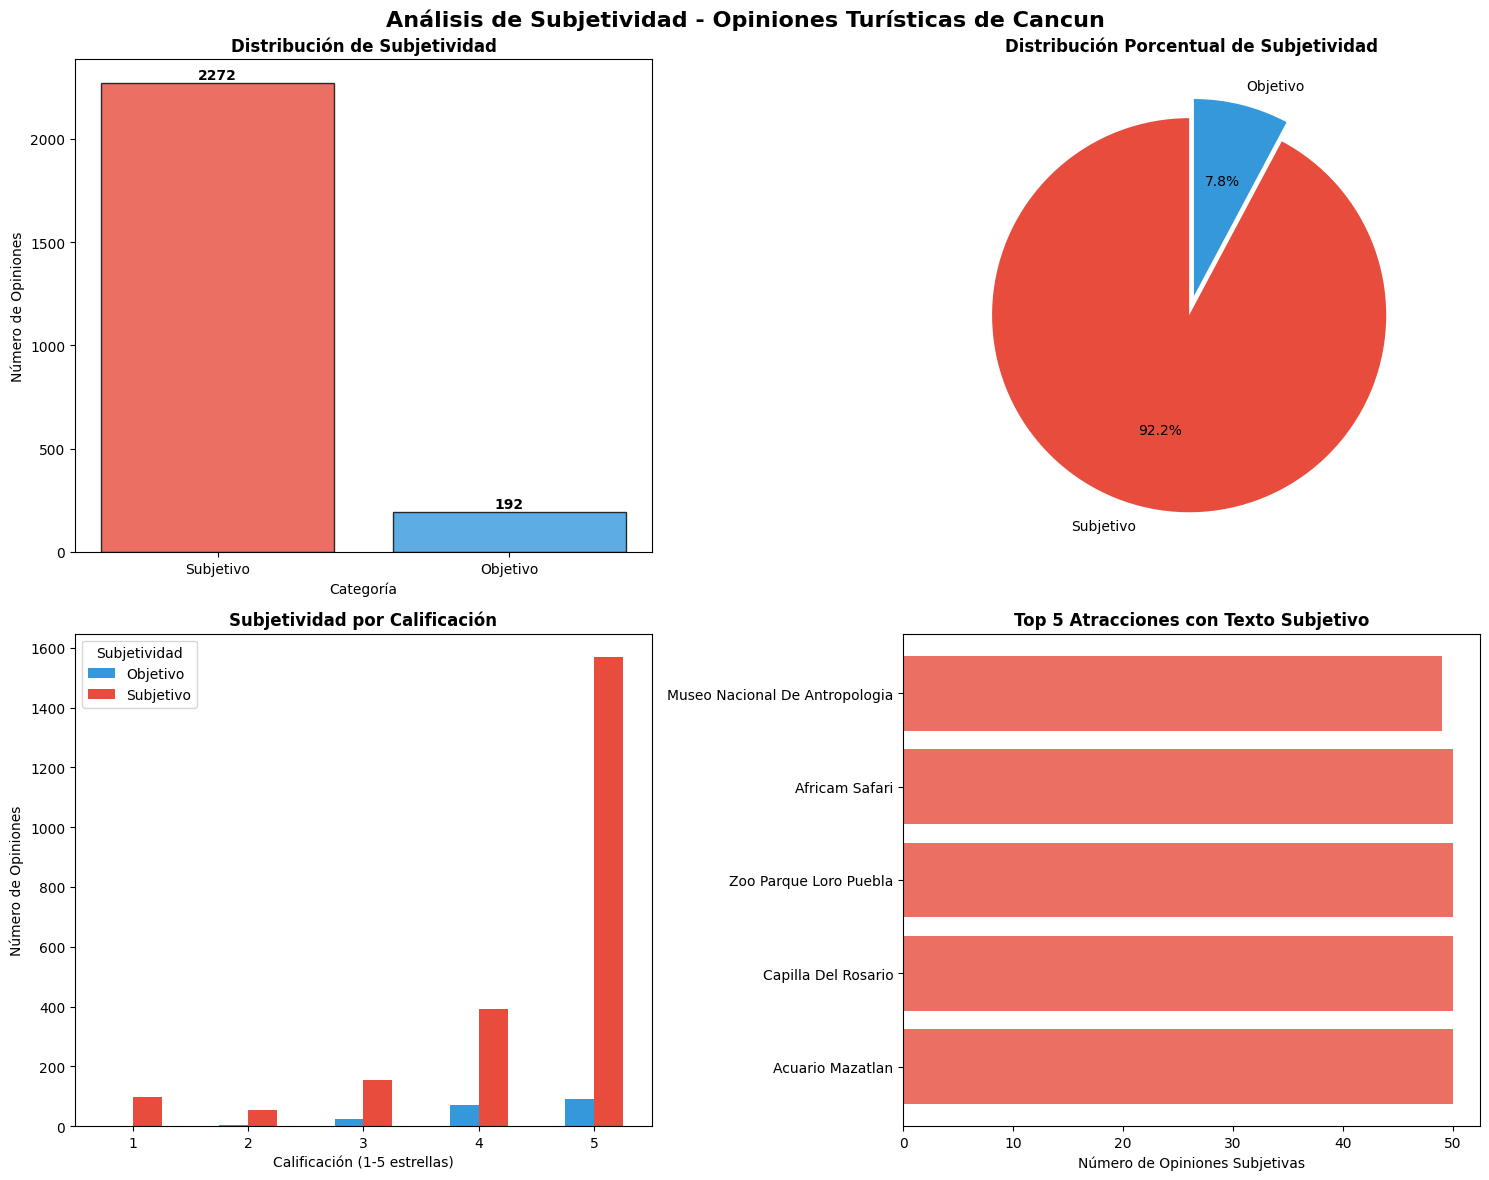

In [22]:
from subjetividad import VisualizadorSubjetividad
import matplotlib.pyplot as plt

visualizador = VisualizadorSubjetividad()
ciudad = df_con_subjetividad['Ciudad'].iloc[0]

fig_basicas = visualizador.crear_visualizaciones_basicas(df_con_subjetividad, ciudad)
plt.show()

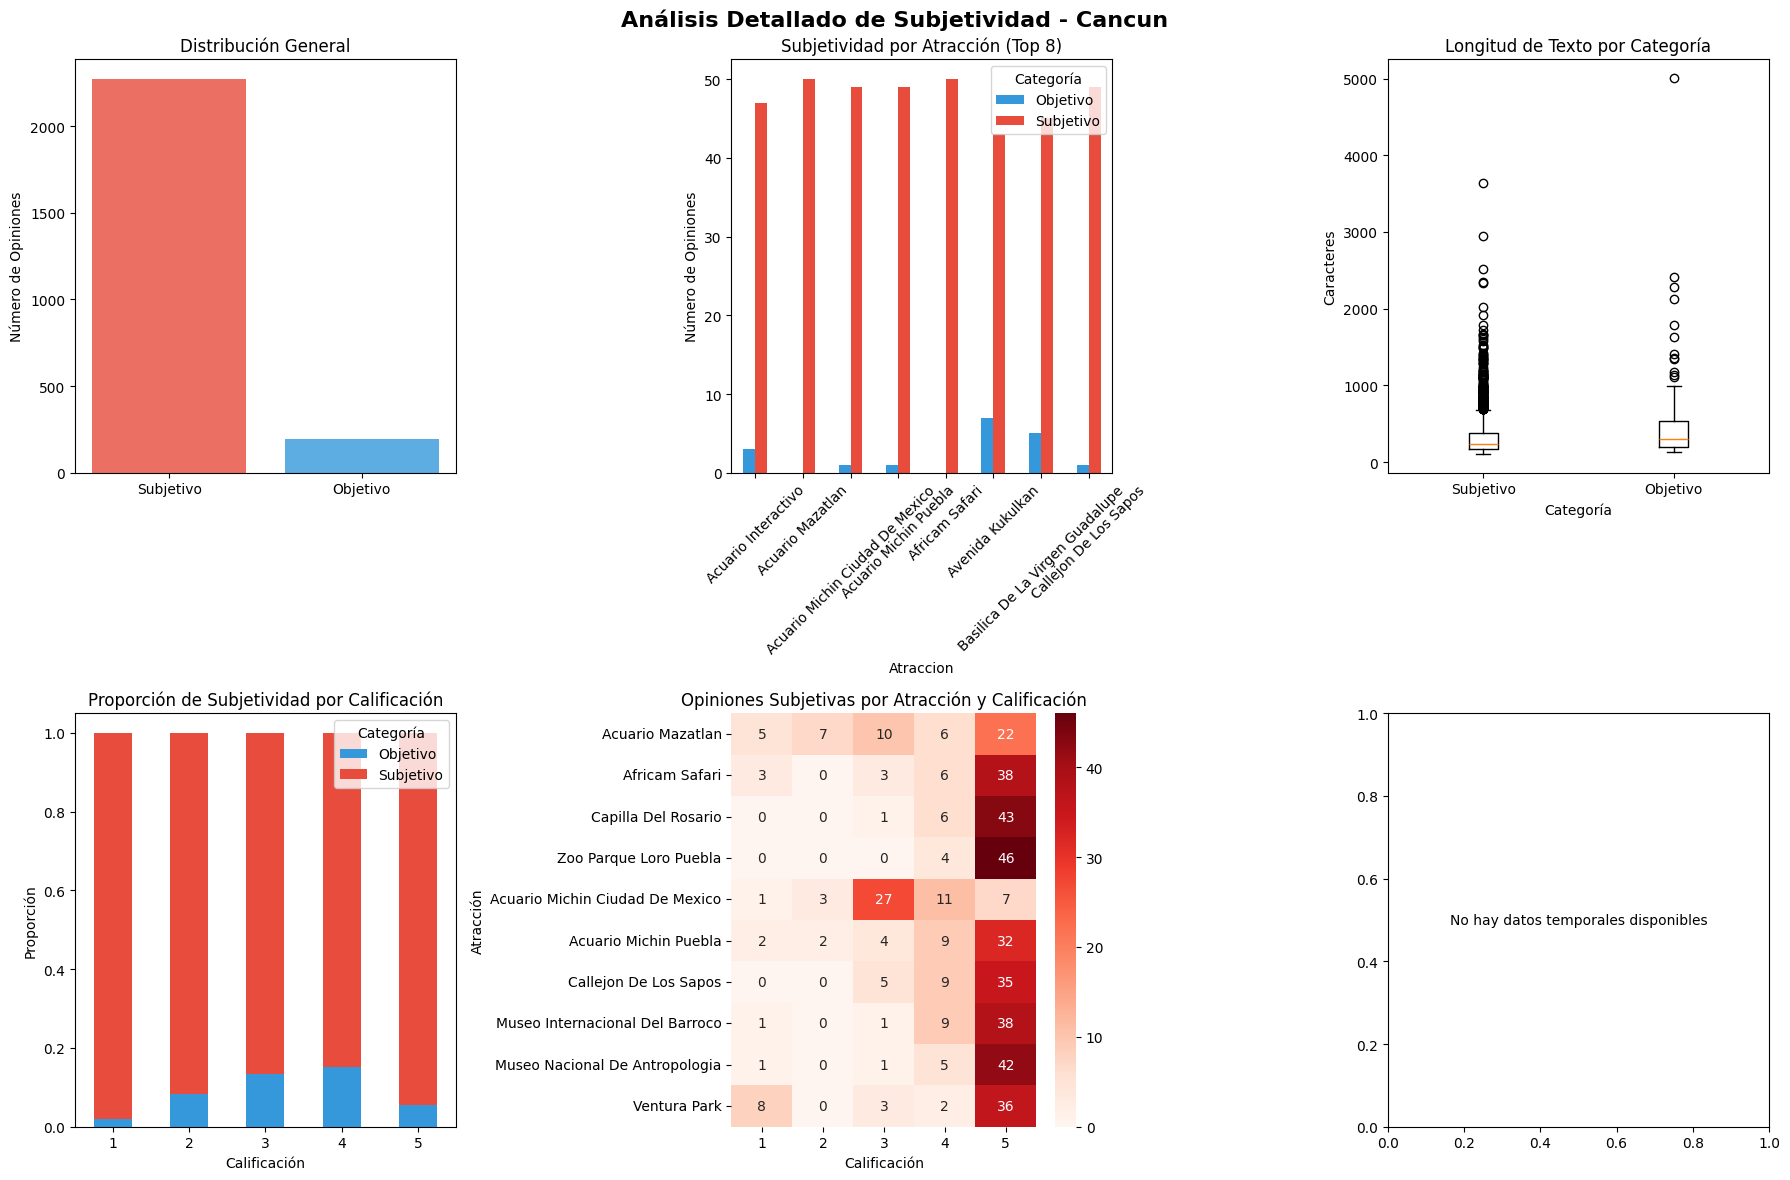

In [23]:
fig_detalladas = visualizador.crear_visualizacion_detallada(df_con_subjetividad, ciudad)
plt.show()

# An√°lisis Combinado: Subjetividad vs Sentimientos

En esta secci√≥n analizaremos la relaci√≥n entre la subjetividad del texto y los sentimientos expresados. Esto nos permitir√° entender:

- **¬øEl texto subjetivo tiende a ser m√°s positivo o negativo?**
- **¬øEl texto objetivo mantiene neutralidad en los sentimientos?**
- **¬øC√≥mo se distribuyen los sentimientos dentro de cada categor√≠a de subjetividad?**
- **¬øExiste correlaci√≥n entre ser subjetivo y expresar sentimientos extremos?**

Este an√°lisis combinado nos dar√° una visi√≥n m√°s completa del comportamiento emocional y la objetividad en las opiniones tur√≠sticas.

In [24]:
estadisticas_combinadas = analizador.analizar_subjetividad_por_sentimientos(df_con_subjetividad)
analizador.mostrar_estadisticas_subjetividad_sentimientos(estadisticas_combinadas)


üìä AN√ÅLISIS DE SUBJETIVIDAD vs SENTIMIENTOS
üìà Total de registros analizados: 2464
üìù Texto subjetivo: 2272 (92.2%)
üìã Texto objetivo: 192 (7.8%)

üìã TABLA CRUZADA COMPLETA:
----------------------------------------
SentimientoPorHF   Negativo  Neutro  Positivo   All
SubjetividadConHF                                  
Objetivo                 15      26       151   192
Subjetivo               236     122      1914  2272
All                     251     148      2065  2464

üìä DISTRIBUCI√ìN PORCENTUAL POR SUBJETIVIDAD:
--------------------------------------------------
SentimientoPorHF   Negativo  Neutro  Positivo
SubjetividadConHF                            
Objetivo                7.8    13.5      78.6
Subjetivo              10.4     5.4      84.2

üîç SENTIMIENTOS EN TEXTO SUBJETIVO:
----------------------------------------
   ‚Ä¢ Positivo: 1914 (84.2%)
   ‚Ä¢ Negativo: 236 (10.4%)
   ‚Ä¢ Neutro: 122 (5.4%)

üîç SENTIMIENTOS EN TEXTO OBJETIVO:
--------------------------

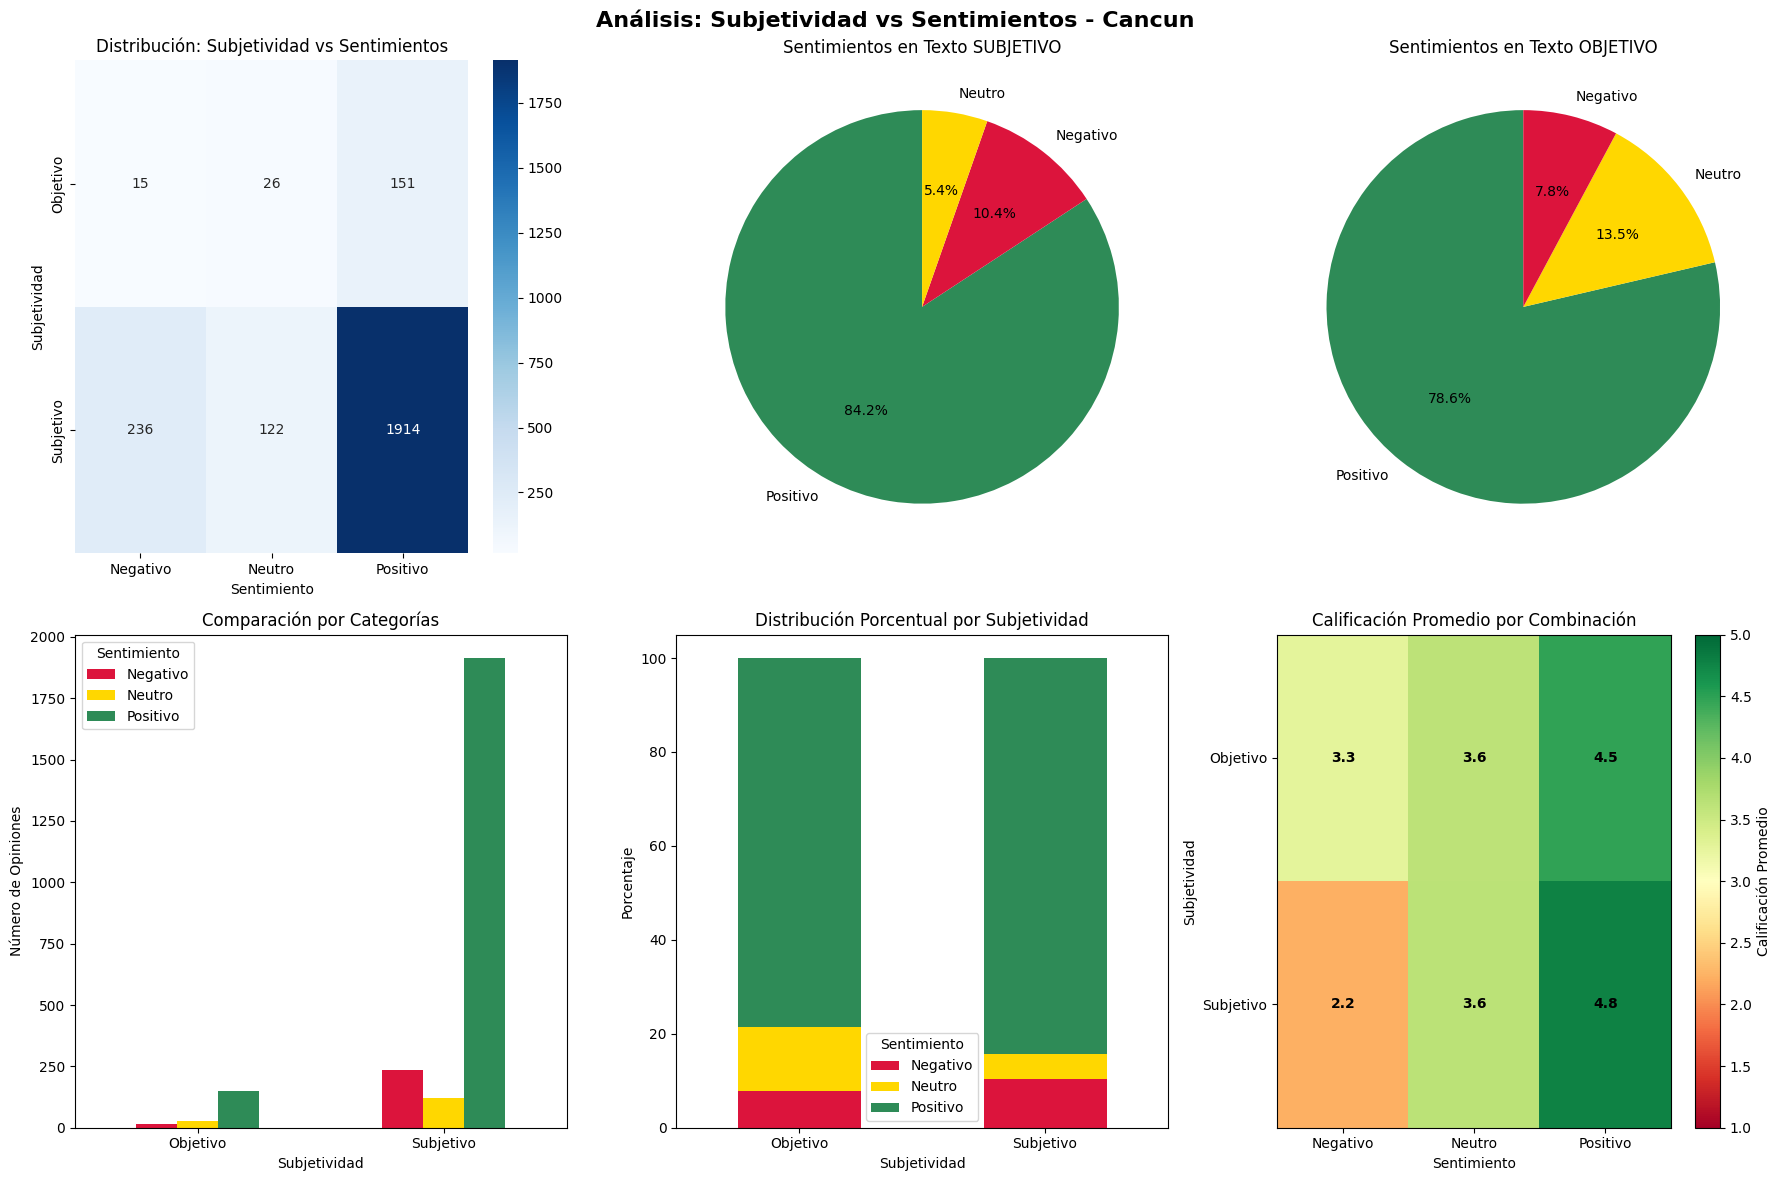

In [25]:
fig_combinado = visualizador.crear_visualizacion_subjetividad_vs_sentimientos(df_con_subjetividad, ciudad)
plt.show()

In [26]:
sentimientos = df_con_subjetividad['SentimientoPorHF'].unique()

for sentimiento in sentimientos:
    df_sentimiento = df_con_subjetividad[df_con_subjetividad['SentimientoPorHF'] == sentimiento]
    total_sentimiento = len(df_sentimiento)
    
    print(f"\nüéØ {sentimiento.upper()}: {total_sentimiento} opiniones")
    
    subjetividad_en_sentimiento = df_sentimiento['SubjetividadConHF'].value_counts()
    for subj_tipo, cantidad in subjetividad_en_sentimiento.items():
        porcentaje = (cantidad / total_sentimiento) * 100
        print(f"   ‚Ä¢ {subj_tipo}: {cantidad} ({porcentaje:.1f}%)")


üéØ POSITIVO: 2065 opiniones
   ‚Ä¢ Subjetivo: 1914 (92.7%)
   ‚Ä¢ Objetivo: 151 (7.3%)

üéØ NEGATIVO: 251 opiniones
   ‚Ä¢ Subjetivo: 236 (94.0%)
   ‚Ä¢ Objetivo: 15 (6.0%)

üéØ NEUTRO: 148 opiniones
   ‚Ä¢ Subjetivo: 122 (82.4%)
   ‚Ä¢ Objetivo: 26 (17.6%)


In [27]:
analizador.mostrar_ejemplos_categoria(df_con_subjetividad, categoria='Subjetivo', n_ejemplos=3)


üéØ EJEMPLOS DE TEXTO SUBJETIVO
----------------------------------------------------------------------

üìå Ejemplo 1:
   üèõÔ∏è Atracci√≥n: Acuario Michin Puebla
   ‚≠ê Calificaci√≥n: 5 estrellas
   üìù Texto completo:
      "Fue muy WOW mi experiencia ya que me fascinan las especies. Las especies, el personal y actividades, el asombro de las especies es muy espectacular ya que hay bastantes y muy variadas m√°s aparte la comida que puedes encontrar."
   üè∑Ô∏è Categor√≠a: Subjetivo

üìå Ejemplo 2:
   üèõÔ∏è Atracci√≥n: Basilica De La Virgen Guadalupe
   ‚≠ê Calificaci√≥n: 4 estrellas
   üìù Texto completo:
      "Sacred site worth visiting. I was raised Catholic but no longer practice.  Still you needn't be religious to find that this site is worth the trip and an hour or two of your time.  It's really a huge complex.  The new basilica houses the image of the virgin, which is located behind the altar.  Visit all of the churches/chapels to get the complete picture and to enjoy

In [28]:
analizador.mostrar_ejemplos_categoria(df_con_subjetividad, categoria='Objetivo', n_ejemplos=3)


üéØ EJEMPLOS DE TEXTO OBJETIVO
----------------------------------------------------------------------

üìå Ejemplo 1:
   üèõÔ∏è Atracci√≥n: Museo Frida Kahlo
   ‚≠ê Calificaci√≥n: 5 estrellas
   üìù Texto completo:
      "Mexican feminist is renowned artist. Frida Kahlo (1907-1954) was eminent Mexican artist who married Diego Rivero, a famous painter. Frida Kahlo is known for her self-portraits and her paintings of natural Mexican subjects. Frida Kahlo is known for her unique beauty; she suffered from polio and accidents but emerged as one of the great feminist artists of the 20th Century. Many of her works are held in public collections in Mexico and overseas."
   üè∑Ô∏è Categor√≠a: Objetivo

üìå Ejemplo 2:
   üèõÔ∏è Atracci√≥n: Castillo De Chapultepec
   ‚≠ê Calificaci√≥n: 5 estrellas
   üìù Texto completo:
      "A Beautiful Day at Chapultepec!. When I checked online, it showed that tickets to Chapultepec Castle were sold out, and I was initially quite disappointed. But we 

In [29]:
analizador.mostrar_todos_los_ejemplos(df_con_subjetividad, n_ejemplos=5)

üîç EJEMPLOS REPRESENTATIVOS POR CATEGOR√çA DE SUBJETIVIDAD

üéØ EJEMPLOS DE TEXTO SUBJETIVO
----------------------------------------------------------------------

üìå Ejemplo 1:
   üèõÔ∏è Atracci√≥n: Acuario Michin Puebla
   ‚≠ê Calificaci√≥n: 5 estrellas
   üìù Texto completo:
      "Experiencia √∫nica. El lugar ha superado mis expectativas,  est√° lleno de muchas experiencias incre√≠bles, adem√°s de que el personal es s√∫per amable. ‚ú®Ô∏è."
   üè∑Ô∏è Categor√≠a: Subjetivo

üìå Ejemplo 2:
   üèõÔ∏è Atracci√≥n: Vallarta Parroquia De Nuestra Se√±ora De Guadalupe
   ‚≠ê Calificaci√≥n: 4 estrellas
   üìù Texto completo:
      "Beautiful Cathedral. Easy to stop in and see while on your visit to the boardwalk.  Beautiful architecture!  Well worth the short time it takes to view this beautiful piece of history."
   üè∑Ô∏è Categor√≠a: Subjetivo

üìå Ejemplo 3:
   üèõÔ∏è Atracci√≥n: Vallarta San Pancho
   ‚≠ê Calificaci√≥n: 5 estrellas
   üìù Texto completo:
      "Ambiente rel

In [30]:
# Tabla cruzada subjetividad vs calificaciones
tabla_cruzada = pd.crosstab(df_con_subjetividad['SubjetividadConHF'], df_con_subjetividad['Calificacion'], margins=True)
display(tabla_cruzada)

tabla_porcentual = pd.crosstab(df_con_subjetividad['SubjetividadConHF'], df_con_subjetividad['Calificacion'], normalize='columns') * 100
display(tabla_porcentual.round(1))

Calificacion         1   2    3    4     5   All
SubjetividadConHF                               
Objetivo             2   5   24   70    91   192
Subjetivo           99  55  156  393  1569  2272
All                101  60  180  463  1660  2464

Calificacion          1     2     3     4     5
SubjetividadConHF                              
Objetivo            2.0   8.3  13.3  15.1   5.5
Subjetivo          98.0  91.7  86.7  84.9  94.5

In [31]:
analizador.generar_resumen_final(df_con_subjetividad)


 RESUMEN FINAL 
‚úÖ An√°lisis de subjetividad completado exitosamente
üèôÔ∏è Ciudad analizada: Cancun
üìä Total de opiniones analizadas: 2464
üéØ Atracciones √∫nicas: 50
ü§ñ Modelo utilizado: GroNLP/mdebertav3-subjectivity-multilingual
üìä ESTAD√çSTICAS DESCRIPTIVAS DE SUBJETIVIDAD
üî¢ DISTRIBUCI√ìN DE SUBJETIVIDAD:
----------------------------------------
 Subjetivo: 2272 registros ( 92.2%)
  Objetivo: 192 registros (  7.8%)

üìà TOTAL DE REGISTROS: 2464

üìù DESCRIPCI√ìN DE CATEGOR√çAS:
----------------------------------------
 Subjetivo: Texto que expresa opiniones, emociones, evaluaciones personales
  Objetivo: Texto que presenta hechos, informaci√≥n factual sin opiniones


Hipotesis: tenemos muy pocas opiniones objetivas debido a que las personas suelen tener una opinion mixta.

Se validara en el siguiente notebook

In [32]:
# Sobrescribir el dataset original agregando la columna SubjetividadConHF
import pandas as pd

ruta_dataset_original = '../data/processed/dataset_opiniones_analisis.csv'

# Verificar que tenemos la columna SubjetividadConHF
if 'SubjetividadConHF' not in df_con_subjetividad.columns:
    print("‚ùå Error: La columna SubjetividadConHF no se encontr√≥ en el dataset")
else:
    # Sobrescribir el archivo original agregando la nueva columna
    df_con_subjetividad.to_csv(ruta_dataset_original, index=False, encoding='utf-8')
    
    print(f"‚úÖ Dataset original actualizado en: {ruta_dataset_original}")
    print(f"üìä Total de registros: {len(df_con_subjetividad)}")
    print(f"üìã Columnas incluidas: {list(df_con_subjetividad.columns)}")
    
    # Mostrar distribuci√≥n de la nueva columna
    distribucion_subjetividad = df_con_subjetividad['SubjetividadConHF'].value_counts()
    print(f"\nüìà Distribuci√≥n de subjetividad:")
    for categoria, cantidad in distribucion_subjetividad.items():
        porcentaje = (cantidad / len(df_con_subjetividad)) * 100
        print(f"   {categoria}: {cantidad} opiniones ({porcentaje:.1f}%)")
    
    print(f"\n‚úÖ El dataset ahora incluye la columna 'SubjetividadConHF' y est√° listo para uso en an√°lisis posteriores")

‚úÖ Dataset original actualizado en: ../data/processed/dataset_opiniones_analisis.csv
üìä Total de registros: 2464
üìã Columnas incluidas: ['Titulo', 'Review', 'Calificacion', 'FechaEstadia', 'Ciudad', 'Atraccion', 'TituloReview', 'SentimientoPorCalificacion', 'SentimientoPorHF', 'SentimientoPorCardiff', 'SubjetividadConHF']

üìà Distribuci√≥n de subjetividad:
   Subjetivo: 2272 opiniones (92.2%)
   Objetivo: 192 opiniones (7.8%)

‚úÖ El dataset ahora incluye la columna 'SubjetividadConHF' y est√° listo para uso en an√°lisis posteriores
